# Marketing Lab (ML based regression)

**Learning Objectives:**
  * Define and fit ML based regression models
  * Gain exposure to marketing related DataSets

## Context of the Analysis

### Context- A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only  499 US Dollars ($999 on other days). It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.
### Objective - The superstore wants to predict the total spent by each customer on Wines and Meat based on the information available in the dataset.

### About this file
This data was gathered during last year's campaign.
#### Data description is as follows;

* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* ID - Unique ID of each customer
* Year_Birth - Age of the customer
* Complain - 1 if the customer complained in the last 2 years
* Dt_Customer - date of customer's enrollment with the company
* Education - customer's level of education
* Marital - customer's marital status
* Kidhome - number of small children in customer's household
* Teenhome - number of teenagers in customer's household
* Income - customer's yearly household income
* MntFishProducts - the amount spent on fish products in the last 2 years
* MntMeatProducts - the amount spent on meat products in the last 2 years
* MntFruits - the amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - the amount spent on wine products in the last 2 years
* MntGoldProds - the amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through the company's website
* NumWebVisitsMonth - number of visits to company's website in the last month
* Recency - number of days since the last purchase

## 1. Library Import

In [174]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error


In [176]:
import warnings
warnings.filterwarnings("ignore")

## 2. Data loading and DataFrame creation

In [177]:
Data=pd.read_csv("https://raw.githubusercontent.com/thousandoaks/Maths4DS-III/refs/heads/main/datasets/superstore_data.csv")


In [178]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [179]:
Data.sample(3).T

,502,580,131
Id,1740,9855,8920
Year_Birth,1944,1952,1967
Education,Graduation,PhD,Master
Marital_Status,Married,Single,Single
Income,55956.0,62000.0,59235.0
Kidhome,0,0,1
Teenhome,0,1,0
Dt_Customer,7/4/2014,8/25/2013,12/1/2013
Recency,22,25,4
MntWines,760,899,448


## 3. Data Transformation

In [180]:
## We set date related columns as datetimes




In [181]:
# prompt: convert Year_Birth and Dt_Customer to datetimes

# Convert 'Year_Birth' to datetime, assuming it represents the year of birth
Data['Year_Birth'] = pd.to_datetime(Data['Year_Birth'], format='%Y', errors='coerce')

# Convert 'Dt_Customer' to datetime, assuming it's in a standard date format (you might need to adjust the format)
Data['Dt_Customer'] = pd.to_datetime(Data['Dt_Customer'], errors='coerce')


In [182]:
Data.sample(3).T

,2023,553,1728
Id,7419,4607,5577
Year_Birth,1968-01-01 00:00:00,1959-01-01 00:00:00,1983-01-01 00:00:00
Education,Master,Graduation,Graduation
Marital_Status,Divorced,Together,Together
Income,27071.0,71367.0,43776.0
Kidhome,1,0,1
Teenhome,0,0,0
Dt_Customer,2014-04-23 00:00:00,2013-08-23 00:00:00,2014-03-05 00:00:00
Recency,90,24,77
MntWines,8,227,8


In [183]:
## We remove customers being born before 1940 as they are probably ouliers

AgeFilter=Data['Year_Birth']>='1940-01-01'

In [184]:
Data[~AgeFilter]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893-01-01,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,7,0,2,1,1,0,2,4,0,0
827,1150,1899-01-01,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,104,64,224,1,4,6,4,1,0,0
2233,7829,1900-01-01,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,7,4,25,1,2,1,2,5,0,1


In [185]:
# We order the column Dt_Customer_New to determine who is the most recent customer, that defines the most recent date
Data['Dt_Customer'].sort_values()

,Dt_Customer
1509,2012-01-08
2222,2012-01-08
455,2012-01-08
1398,2012-01-08
2239,2012-01-09
...,...
667,2014-12-05
52,2014-12-05
434,2014-12-05
1569,2014-12-05


In [186]:
# We compute the number of days customers have been with the company based on the most recent date 2015-01-01
Data['TimeWithUs']=Data['Dt_Customer'].apply(lambda x:pd.to_datetime('2015-01-01')-x)
Data['MonthsWithUs']=Data['TimeWithUs']/np.timedelta64(30, "D")

In [187]:
## We compute the age of the customer based on the most recent date 2015-01-01

Data['Age']=Data['Year_Birth'].apply(lambda x:pd.to_datetime('2015-01-01')-x)
Data['AgeYears']=Data['Age']/np.timedelta64(365, "D")

In [188]:
SuperStore=Data[AgeFilter]
SuperStore.sample(3).T

,619,823,2232
Id,486,9206,7232
Year_Birth,1988-01-01 00:00:00,1968-01-01 00:00:00,1973-01-01 00:00:00
Education,Graduation,Graduation,Graduation
Marital_Status,Married,Together,Widow
Income,84219.0,77382.0,42429.0
Kidhome,0,0,0
Teenhome,0,1,1
Dt_Customer,2014-02-02 00:00:00,2014-07-01 00:00:00,2014-11-02 00:00:00
Recency,27,36,99
MntWines,434,491,55


In [189]:
# prompt: compute the sum for the column starting with Mnt

# Calculate the sum for columns starting with "Mnt"
mnt_columns = [col for col in SuperStore.columns if col.startswith('Mnt')]
mnt_sum = SuperStore[mnt_columns].sum()

print(mnt_sum)

MntWines            680038
MntFruits            58767
MntMeatProducts     373393
MntFishProducts      83939
MntSweetProducts     60553
MntGoldProds         98358
dtype: int64


## 4. Exploratory Data Analysis

### It is always advisable to conduct an EDA prior to any model training

In [190]:
SuperStore.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'TimeWithUs', 'MonthsWithUs', 'Age',
       'AgeYears'],
      dtype='object')

### Impact of quantitative factors on the responses: MntMeatProducts and MntWines

In [191]:
SuperStore.head(2).T

,0,1
Id,1826,1
Year_Birth,1970-01-01 00:00:00,1961-01-01 00:00:00
Education,Graduation,Graduation
Marital_Status,Divorced,Single
Income,84835.0,57091.0
Kidhome,0,0
Teenhome,0,0
Dt_Customer,2014-06-16 00:00:00,2014-06-15 00:00:00
Recency,0,0
MntWines,189,464


In [192]:
SuperStore = SuperStore.dropna()

In [193]:
quantitativefactorsToExplore=['Income','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','MonthsWithUs','AgeYears']

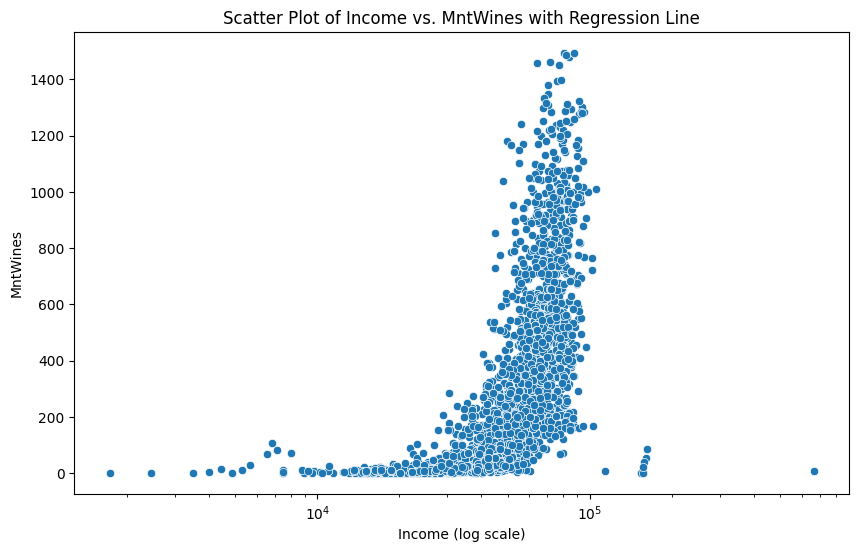

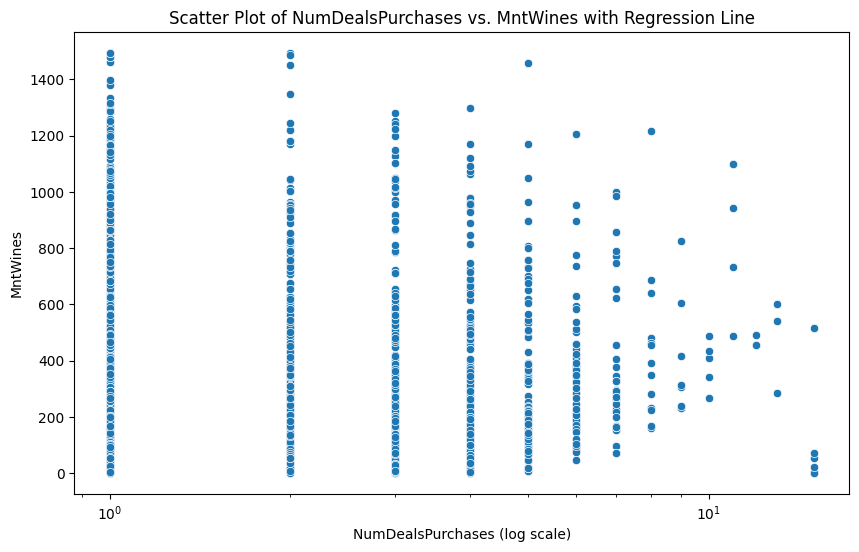

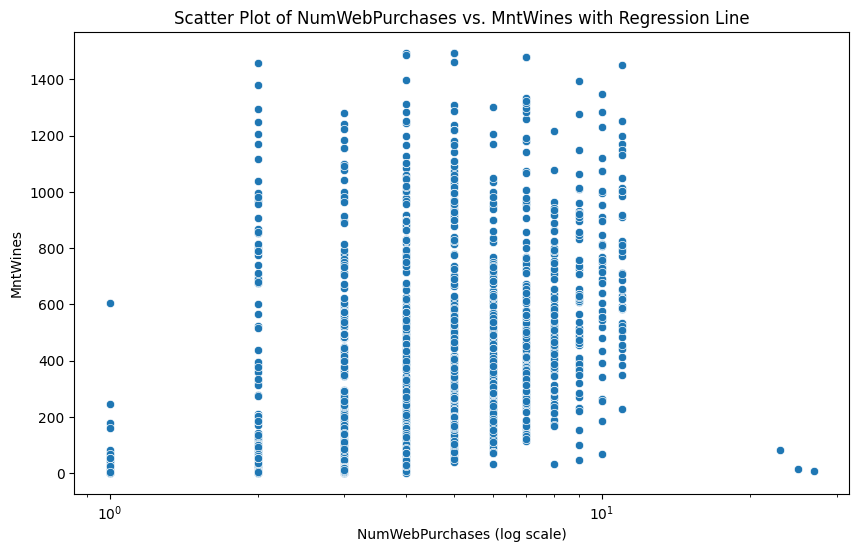

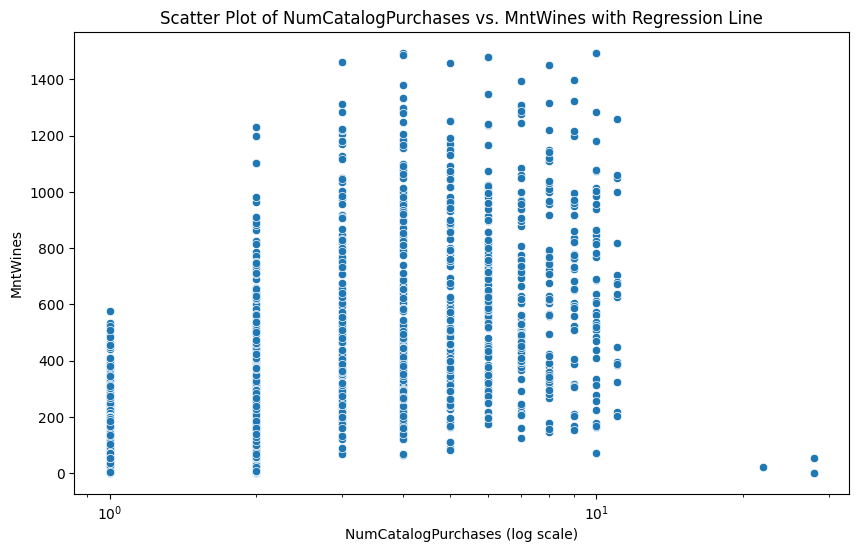

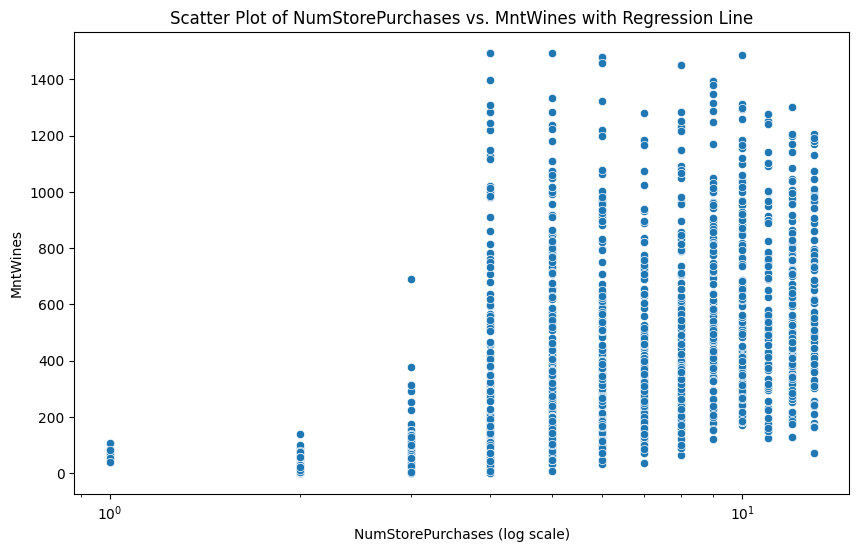

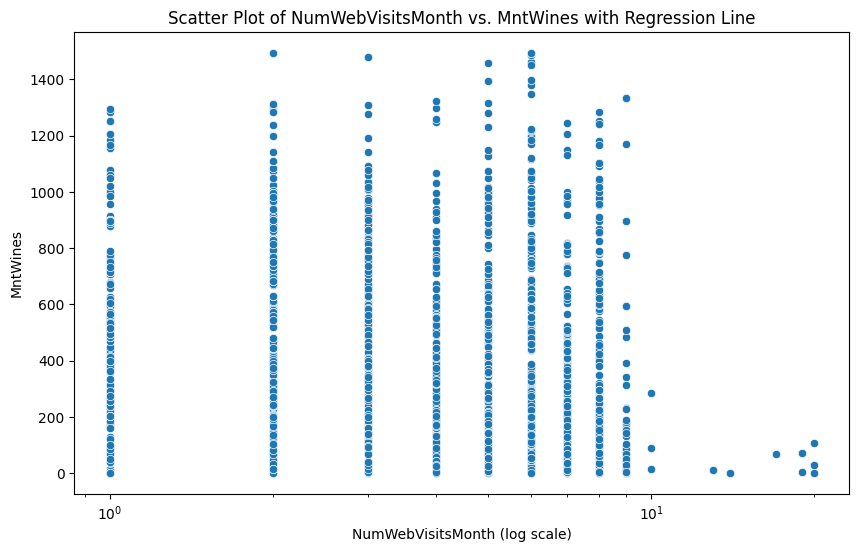

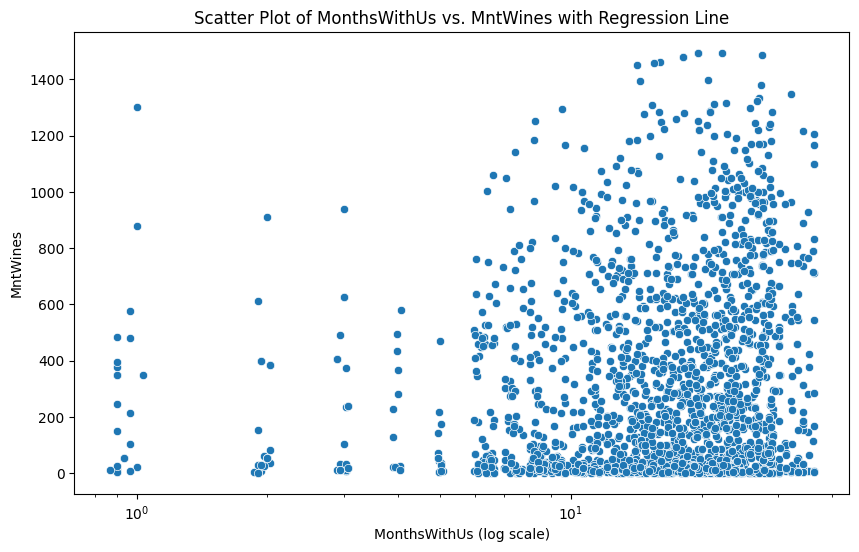

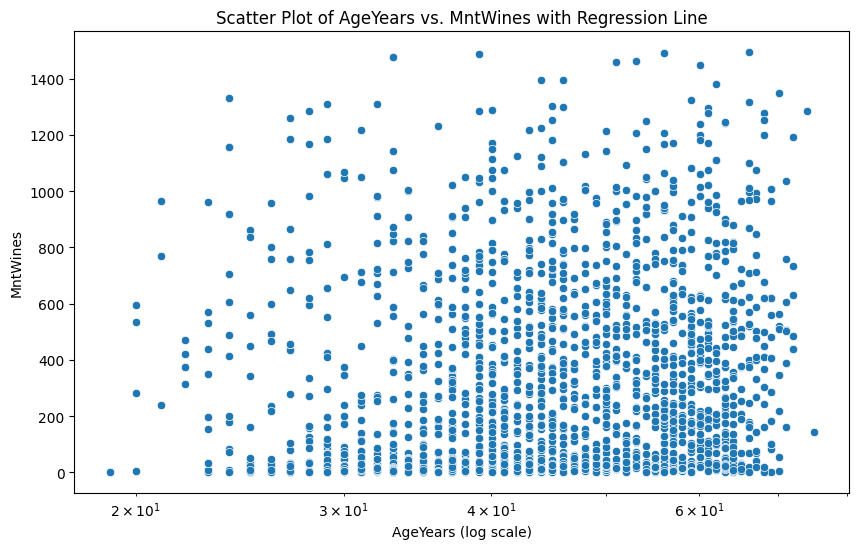

In [194]:
for factor in quantitativefactorsToExplore:


  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=factor, y='MntWines', data=SuperStore)
  plt.xscale('log')  # Set x-axis to log scale
  plt.xlabel(f'{factor} (log scale)')
  plt.ylabel('MntWines')
  plt.title(f'Scatter Plot of {factor} vs. MntWines with Regression Line')

  plt.show()




### Impact of qualitative factors on the response.

In [195]:
SuperStore.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'TimeWithUs', 'MonthsWithUs', 'Age',
       'AgeYears'],
      dtype='object')

In [196]:
qualitativefactorsToExplore=['Education','Marital_Status','Kidhome','Teenhome']

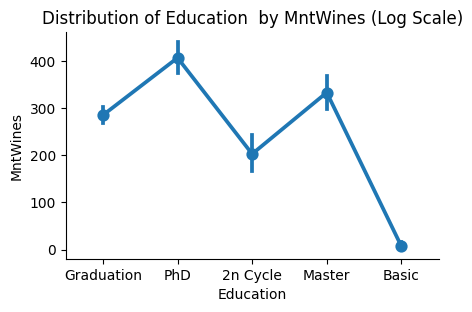

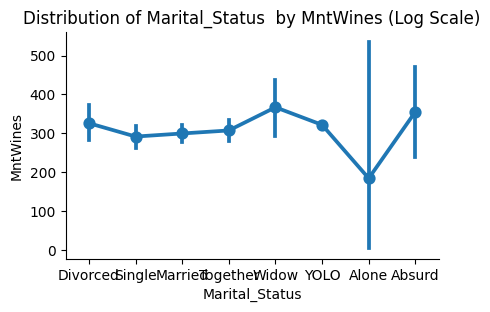

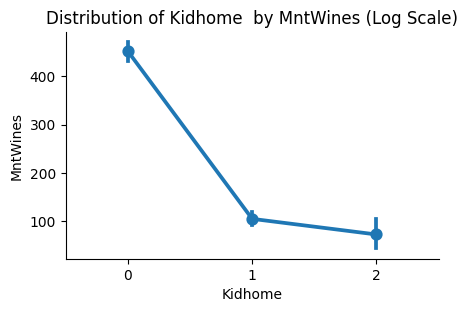

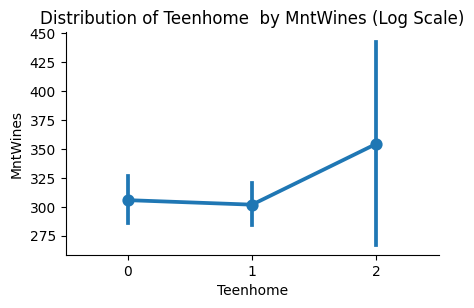

In [197]:
for factor in qualitativefactorsToExplore:

  sns.catplot(data=SuperStore, x=factor, y="MntWines", kind="point",height=3, aspect=1.5)
  #plt.yscale('log')
  plt.title(f'Distribution of {factor}  by MntWines (Log Scale)')
  plt.show()



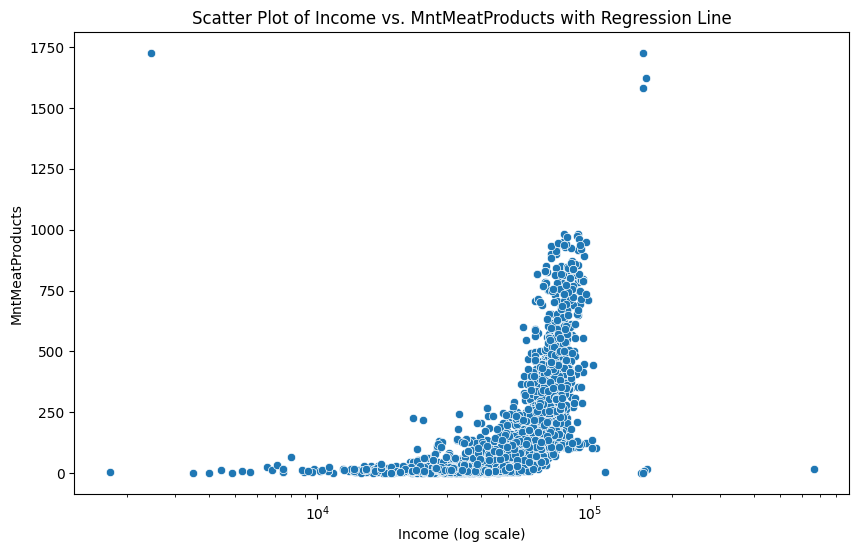

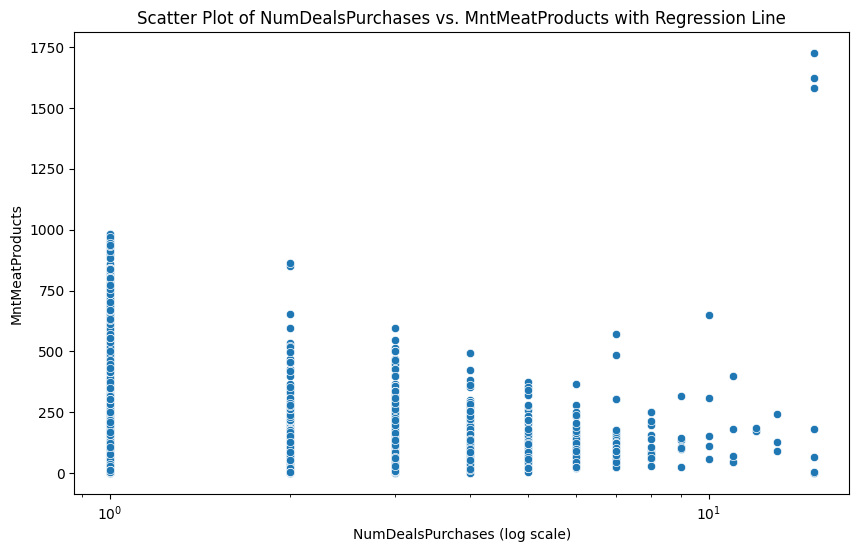

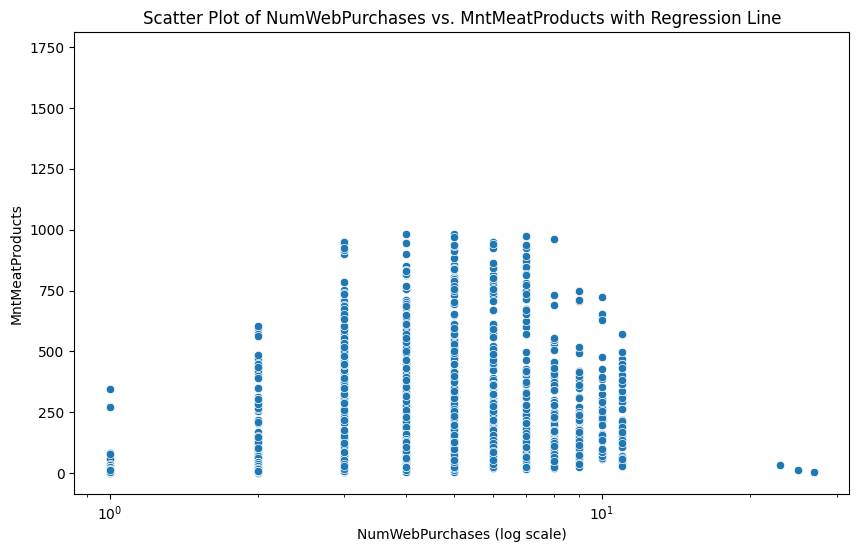

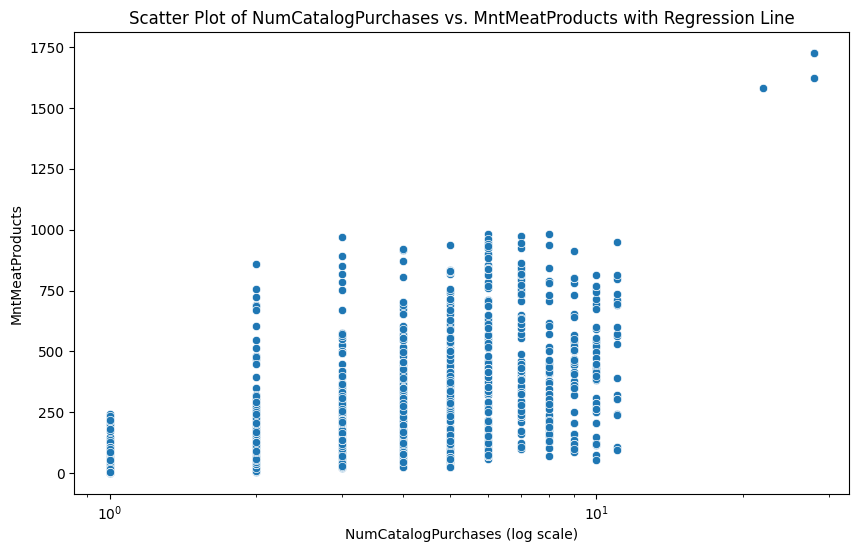

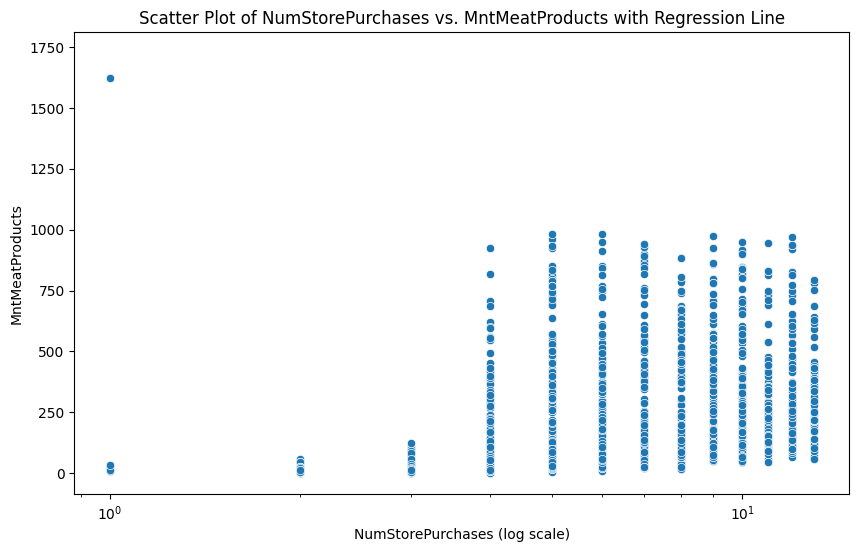

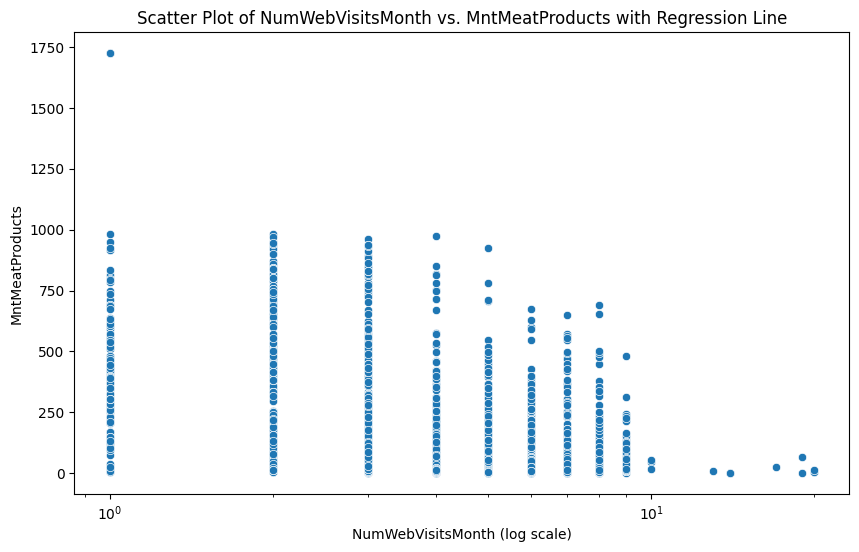

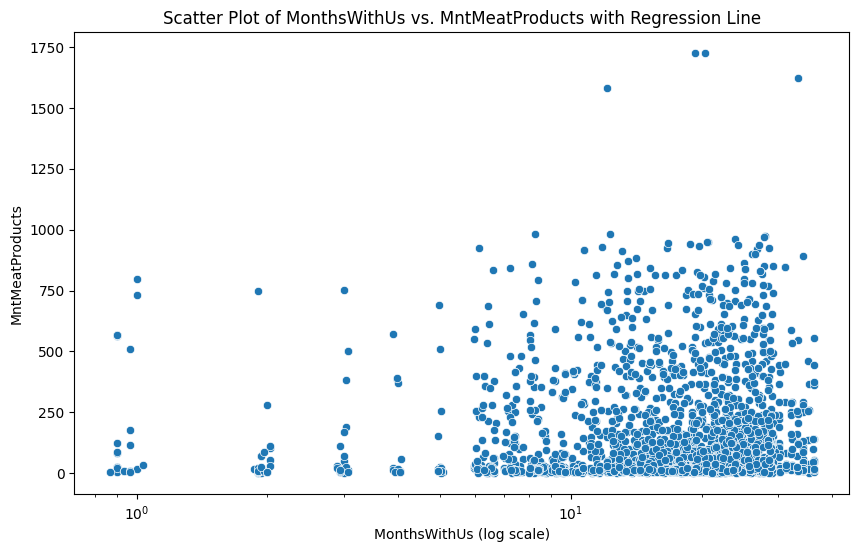

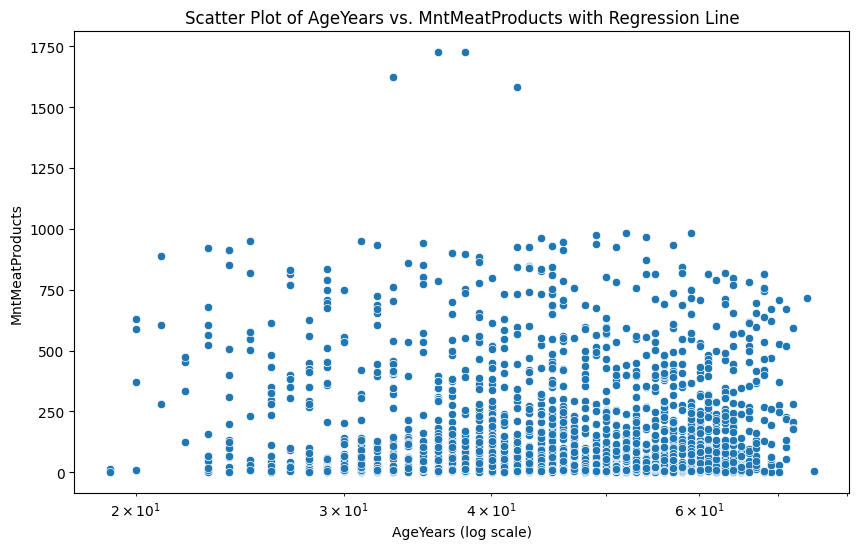

In [198]:
for factor in quantitativefactorsToExplore:


  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=factor, y='MntMeatProducts', data=SuperStore)
  plt.xscale('log')  # Set x-axis to log scale
  plt.xlabel(f'{factor} (log scale)')
  plt.ylabel('MntMeatProducts')
  plt.title(f'Scatter Plot of {factor} vs. MntMeatProducts with Regression Line')

  plt.show()

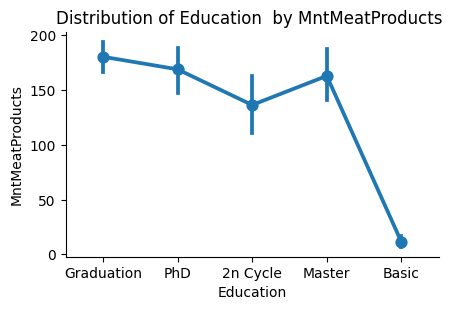

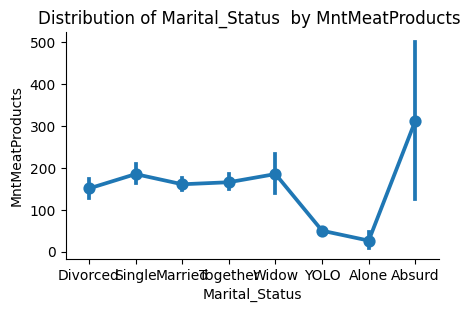

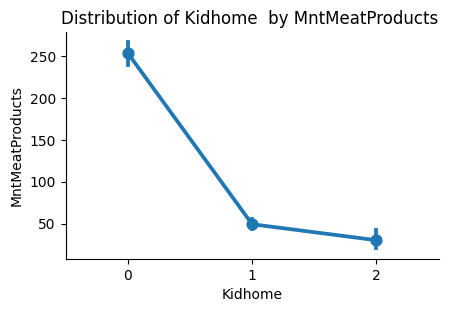

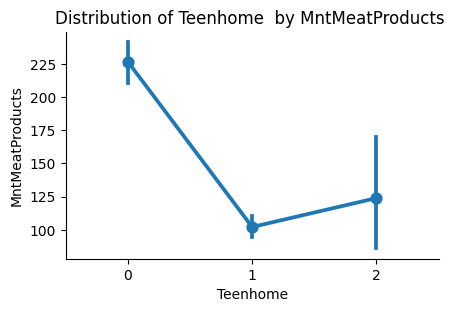

In [199]:
for factor in qualitativefactorsToExplore:

  sns.catplot(data=SuperStore, x=factor, y="MntMeatProducts", kind="point",height=3, aspect=1.5)
  #plt.yscale('log')
  plt.title(f'Distribution of {factor}  by MntMeatProducts ')
  plt.show()

## 5. What drives customers' propensity to spend on wine ?
### We want to explore the impact of each factor on the response. Based on the previous EDA we consider Education, Income and Age
### 5.1 First model (Linear model)

In [200]:
features=['Income','Education','AgeYears','NumStorePurchases']

In [201]:
# Choose target and features
y = SuperStore['MntWines']

X = SuperStore[features]

#### 5.1.1. Encoding of categorical features

Our Dataset has categorical features
 We nee to code them before fitting any model

In [202]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns # Select columns with 'object' dtype
categorical_features

Index(['Education'], dtype='object')

In [203]:
# Create an OrdinalEncoder
enc = OrdinalEncoder()

In [204]:
# Fit and transform the categorical features
X[categorical_features] = enc.fit_transform(X[categorical_features])
X

,Income,Education,AgeYears,NumStorePurchases
0,84835.0,2.0,45.030137,6
1,57091.0,2.0,54.035616,7
2,67267.0,2.0,57.038356,5
3,32474.0,2.0,48.032877,2
4,21474.0,2.0,26.016438,2
...,...,...,...,...
2235,66476.0,4.0,39.027397,11
2236,31056.0,0.0,38.024658,3
2237,46310.0,2.0,39.027397,5
2238,65819.0,2.0,37.024658,10


### 5.1.2. Cross-Validation of a linear model

In [205]:
# prompt: cross validate the model

# Perform cross-validation


linear_model = LinearRegression()

cv_results = cross_validate(linear_model, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'))



# Print the results
print("Cross-validation R^2 scores:", cv_results['test_r2'])
print("Cross-validation MSE scores:", -cv_results['test_neg_mean_squared_error'])
print("Mean R^2:", np.mean(cv_results['test_r2']))
print("Mean MSE:", -np.mean(cv_results['test_neg_mean_squared_error']))

Cross-validation R^2 scores: [0.46538142 0.02924469 0.5589557  0.49323423 0.57470196]
Cross-validation MSE scores: [ 58081.36680754 107265.55651328  49840.52287149  63345.07127624
  47122.96196125]
Mean R^2: 0.4243035983389194
Mean MSE: 65131.09588596


In [206]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40),
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

In [207]:
train_sizes

array([  17,   62,  107,  152,  197,  242,  287,  332,  377,  422,  467,
        511,  556,  601,  646,  691,  736,  781,  826,  871,  916,  961,
       1006, 1051, 1096, 1140, 1185, 1230, 1275, 1320, 1365, 1410, 1455,
       1500, 1545, 1590, 1635, 1680, 1725, 1770])

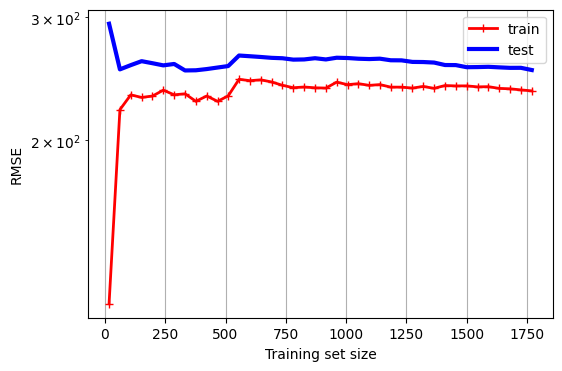

In [208]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="test")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.yscale('log') # Set y-axis to log scale

#plt.axis([-100, 20000, 40000, 120000])

plt.show()

### Second model (polynomial)

#### Let's try with a second order polynomial

In [209]:
# Add quadratic elements

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

### 5.2. Cross-Validation of a linear model (reduced set of features)

In [210]:
# prompt: cross validate the model

# Perform cross-validation


linear_model = LinearRegression()

cv_results = cross_validate(linear_model, X_poly, y, cv=5, scoring=('r2', 'neg_mean_squared_error'))

# Print the results
print("Cross-validation R^2 scores:", cv_results['test_r2'])
print("Cross-validation MSE scores:", -cv_results['test_neg_mean_squared_error'])
print("Mean R^2:", np.mean(cv_results['test_r2']))
print("Mean MSE:", -np.mean(cv_results['test_neg_mean_squared_error']))

Cross-validation R^2 scores: [0.56554894 0.2619771  0.60875276 0.54071341 0.64319813]
Cross-validation MSE scores: [47199.09133048 81549.32181314 44213.17093598 57410.23413694
 39533.59565894]
Mean R^2: 0.5240380688155967
Mean MSE: 53981.08277509546


In [211]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X_poly, y, train_sizes=np.linspace(0.01, 1.0, 40),
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

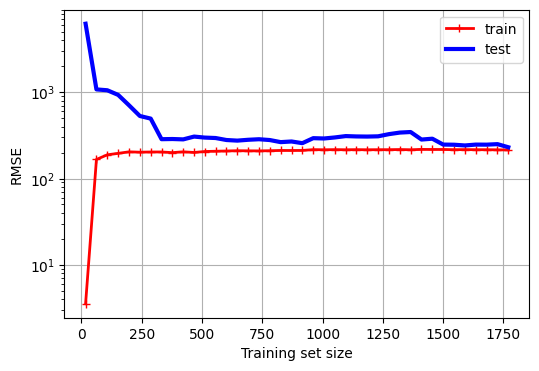

In [212]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="test")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.yscale('log') # Set y-axis to log scale

#plt.axis([10, 20000, 40000, 120000])

plt.show()